#  PREDICCIÓN DE STROKE CON MACHINE LEARNING  :

##Un enfoque moderno para reducir riesgos en salud en el 2025
##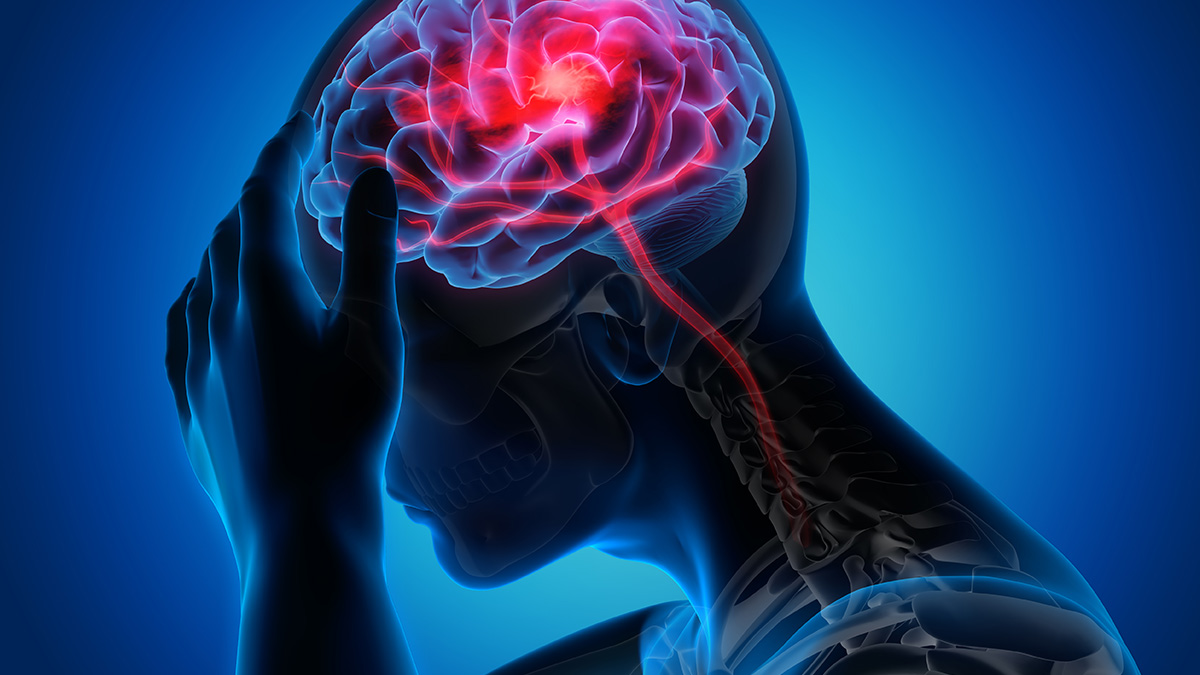

# Predicción de ACV (Accidente Cerebrovascular)

##  Resumen del problema

El accidente cerebrovascular (ACV) sigue siendo, en 2025, una de las principales causas de discapacidad y muerte a nivel mundial. Según los últimos datos publicados por organizaciones de salud internacionales, se estima que **el riesgo de sufrir un ACV ha aumentado más del 55% en los últimos 20 años**.

Actualmente, se calcula que **1 de cada 4 personas** en el mundo experimentará un ACV en algún momento de su vida.

Entre 2000 y 2024, los estudios globales indican:

-  Un aumento del **75% en la incidencia** de ACV.
-  Un incremento del **47% en las muertes** por esta causa.
-  Una **crecida del 110% en la prevalencia** de los casos.
-  Un alarmante aumento del **150% en los años de vida ajustados por discapacidad (DALY)**.

Además, se mantiene una **desigualdad profunda**: más del **85% de las muertes y el 88% de la carga de enfermedad** por ACV se concentran en países de ingresos bajos y medios, afectando especialmente a familias con recursos limitados y acceso restringido a servicios médicos preventivos.

---

##  Objetivo del proyecto

Este proyecto busca desarrollar un modelo que pueda **predecir si un paciente está en riesgo de sufrir un ACV**. Al tratarse de un problema de clasificación, el principal enfoque estará en **maximizar la sensibilidad** o *recall*, lo cual es esencial en contextos médicos donde detectar todos los casos posibles puede marcar la diferencia.

Minimizar los **falsos negativos** es fundamental, ya que dejar de identificar un caso real puede tener consecuencias graves para la salud del paciente.

---

##  Alcance

El análisis se centrará en:

- Obtener un modelo con **alto recall**.
- Seleccionar las variables más significativas para interpretar **qué factores influyen más** en la ocurrencia de un ACV.

El objetivo no es solo obtener una buena predicción, sino también **comprender el fenómeno clínico** desde los datos.

---

##  Descripción del conjunto de datos

- **Fuente**: [Kaggle Dataset - Stroke Prediction](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)
- **Tamaño**: 5,110 registros y 12 columnas.
- **Tipo de datos**: Mezcla de variables numéricas y categóricas.

> + *Aunque el conjunto de datos fue publicado antes de 2025, sigue siendo utilizado como base por su estructura limpia y representativa del fenómeno.*

---

##  Descripción de las variables

1. **id**: Identificador único del paciente.  
2. **gender**: Género del paciente (`Male`, `Female`, `Other`).  
3. **age**: Edad.  
4. **hypertension**: `1` si el paciente tiene hipertensión, `0` si no.  
5. **heart_disease**: `1` si sufre enfermedades cardíacas, `0` si no.  
6. **ever_married**: Indica si ha estado casado/a (`Yes` o `No`).  
7. **work_type**: Tipo de empleo (`children`, `Govt_job`, `Never_worked`, `Private`, `Self-employed`).  
8. **Residence_type**: Lugar de residencia (`Urban` o `Rural`).  
9. **avg_glucose_level**: Nivel promedio de glucosa en sangre.  
10. **bmi**: Índice de masa corporal.  
11. **smoking_status**: Estado del hábito de fumar (`formerly smoked`, `never smoked`, `smokes`, `Unknown`).  
12. **stroke** (variable objetivo): `1` si ha tenido un ACV, `0` si no.

>  **Nota**: `"Unknown"` en `smoking_status` indica que no se dispone de esta información para ese paciente.

---



##  Importación de librerías

En esta sección se cargan todas las bibliotecas necesarias para el análisis, procesamiento y modelado del conjunto de datos.

In [19]:
import pandas as pd #manejo DataFrame
import numpy as np #Operaciones Aritmeticas
import seaborn as sns #Graficas
import matplotlib.pyplot as plt #Graficas
from sklearn.utils import resample
from scipy.stats import entropy as en
import math
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [20]:
from google.colab import files
uploaded = files.upload()



Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (3).csv


In [21]:

# Cargar dataset DESPUÉS de files.upload()
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Revisar que se cargó bien
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Cambio de datos

In [22]:
dataset['stroke'] = dataset['stroke'].replace({0: 'Sin ataque', 1: 'Ataque'})

In [23]:
dataset['hypertension'] = dataset['hypertension'].replace({0: 'No', 1: 'Sí'})

In [24]:
dataset['heart_disease'] = dataset['heart_disease'].replace({0: 'No', 1: 'Sí'})

In [25]:
dataset['smoking_status'] = dataset['smoking_status'].replace({
    'Unknown': 'Desconocido',
    'formerly smoked': 'Fumó anteriormente',
    'never smoked': 'Nunca fumó',
    'smokes': 'Fuma'
})


In [26]:
dataset['work_type'] = dataset['work_type'].replace({
    'Govt_job': 'Empleado público',
    'Never_worked': 'Nunca trabajó',
    'Private': 'Empleado privado',
    'Self-employed': 'Independiente',
    'children': 'Niño/a'
})


In [27]:
dataset['gender'] = dataset['gender'].replace({
    'Male': 'Hombre',
    'Female': 'Mujer',
    'Other': 'Otro'
})

# Comprensión de los Datos

In [28]:
dataset.head(50)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Hombre,67.0,No,Sí,Yes,Empleado privado,Urban,228.69,36.6,Fumó anteriormente,Ataque
1,51676,Mujer,61.0,No,No,Yes,Independiente,Rural,202.21,NaN,Nunca fumó,Ataque
2,31112,Hombre,80.0,No,Sí,Yes,Empleado privado,Rural,105.92,32.5,Nunca fumó,Ataque
3,60182,Mujer,49.0,No,No,Yes,Empleado privado,Urban,171.23,34.4,Fuma,Ataque
4,1665,Mujer,79.0,Sí,No,Yes,Independiente,Rural,174.12,24.0,Nunca fumó,Ataque
5,56669,Hombre,81.0,No,No,Yes,Empleado privado,Urban,186.21,29.0,Fumó anteriormente,Ataque
6,53882,Hombre,74.0,Sí,Sí,Yes,Empleado privado,Rural,70.09,27.4,Nunca fumó,Ataque
7,10434,Mujer,69.0,No,No,No,Empleado privado,Urban,94.39,22.8,Nunca fumó,Ataque
8,27419,Mujer,59.0,No,No,Yes,Empleado privado,Rural,76.15,NaN,Desconocido,Ataque
9,60491,Mujer,78.0,No,No,Yes,Empleado privado,Urban,58.57,24.2,Desconocido,Ataque


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


Se necesita saber el total de los datos faltantes de cada item.

In [30]:

dataset.isnull().sum()


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [31]:
dataset.describe()


,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


Reemplazar los vacíos existentes en bmi con la media

In [32]:
dataset['bmi']=dataset['bmi'].replace(np.nan, 28.8)
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Hombre,67.0,No,Sí,Yes,Empleado privado,Urban,228.69,36.6,Fumó anteriormente,Ataque
1,51676,Mujer,61.0,No,No,Yes,Independiente,Rural,202.21,28.8,Nunca fumó,Ataque
2,31112,Hombre,80.0,No,Sí,Yes,Empleado privado,Rural,105.92,32.5,Nunca fumó,Ataque
3,60182,Mujer,49.0,No,No,Yes,Empleado privado,Urban,171.23,34.4,Fuma,Ataque
4,1665,Mujer,79.0,Sí,No,Yes,Independiente,Rural,174.12,24.0,Nunca fumó,Ataque
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Mujer,80.0,Sí,No,Yes,Empleado privado,Urban,83.75,28.8,Nunca fumó,Sin ataque
5106,44873,Mujer,81.0,No,No,Yes,Independiente,Urban,125.20,40.0,Nunca fumó,Sin ataque
5107,19723,Mujer,35.0,No,No,Yes,Independiente,Rural,82.99,30.6,Nunca fumó,Sin ataque
5108,37544,Hombre,51.0,No,No,Yes,Empleado privado,Rural,166.29,25.6,Fumó anteriormente,Sin ataque


Revisión de nulos rellenados

In [33]:
dataset.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


Clasificación de la glucosa promedio por medio de rangos

In [34]:
def clasificar_glucosa(valor):
    if valor < 70:
        return 'Bajo'
    elif valor <= 99:
        return 'Normal'
    else:
        return 'Alto'

dataset['avg_glucose_level'] = dataset['avg_glucose_level'].apply(clasificar_glucosa)


Clasificación de BMI por rangos y reemplazarlo

In [35]:
def clasificar_bmi(valor):
    if valor < 19:
        return 'Bajo de peso'
    elif valor <= 25:
        return 'Peso normal'
    else:
        return ' Sobrepeso'

dataset['bmi'] = dataset['bmi'].apply(clasificar_bmi)

Clasificar la edad por rangos y generar nueva columna

In [36]:
def clasificar_edad(edad):
    if edad <= 20:
        return 'joven'
    elif 21 <= edad <= 60:
        return 'adulto'
    else:
        return 'adulto mayor'

dataset['Rango_edad'] = dataset['age'].apply(clasificar_edad)

Revisión de cambios realizados

In [37]:
dataset.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Rango_edad
0,9046,Hombre,67.0,No,Sí,Yes,Empleado privado,Urban,Alto,Sobrepeso,Fumó anteriormente,Ataque,adulto mayor
1,51676,Mujer,61.0,No,No,Yes,Independiente,Rural,Alto,Sobrepeso,Nunca fumó,Ataque,adulto mayor
2,31112,Hombre,80.0,No,Sí,Yes,Empleado privado,Rural,Alto,Sobrepeso,Nunca fumó,Ataque,adulto mayor
3,60182,Mujer,49.0,No,No,Yes,Empleado privado,Urban,Alto,Sobrepeso,Fuma,Ataque,adulto
4,1665,Mujer,79.0,Sí,No,Yes,Independiente,Rural,Alto,Peso normal,Nunca fumó,Ataque,adulto mayor


# Análisis bivariado


Género vs ACV

In [38]:
dataset.groupby(['gender', 'stroke']).size()


gender  stroke    
Hombre  Ataque         108
        Sin ataque    2007
Mujer   Ataque         141
        Sin ataque    2853
Otro    Sin ataque       1
dtype: int64

edad vs ACV

<Axes: xlabel='stroke', ylabel='age'>

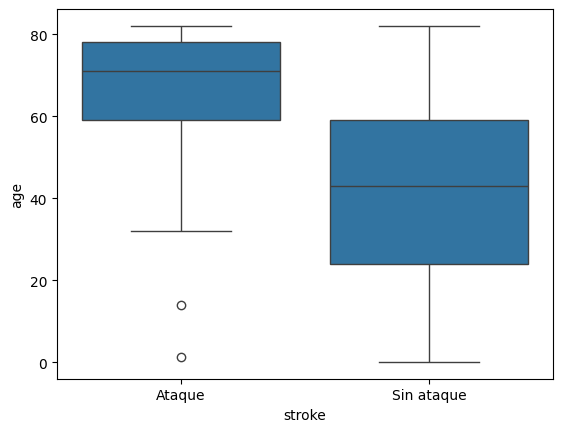

In [39]:
sns.boxplot(dataset, x="stroke", y="age")


Hipertension vs ACV

In [40]:
dataset.groupby(['hypertension', 'stroke']).size()

hypertension  stroke    
No            Ataque         183
              Sin ataque    4429
Sí            Ataque          66
              Sin ataque     432
dtype: int64

Estado civil vs ACV

In [41]:
dataset.groupby(['ever_married', 'stroke']).size()

ever_married  stroke    
No            Ataque          29
              Sin ataque    1728
Yes           Ataque         220
              Sin ataque    3133
dtype: int64

Análisis: El 1% de las personas que no se casan sufren ataques, y el 6% de las personas que se casan sufren ataques, lo que significa que las personas que se casan son más propensas a sufrir un ACV

Enfermedades cardiacas vs ACV

In [42]:
dataset.groupby(['heart_disease', 'stroke']).size()

heart_disease  stroke    
No             Ataque         202
               Sin ataque    4632
Sí             Ataque          47
               Sin ataque     229
dtype: int64

Tipo de trabajo vs ACV


In [43]:
dataset.groupby(['work_type', 'stroke']).size()

work_type         stroke    
Empleado privado  Ataque         149
                  Sin ataque    2776
Empleado público  Ataque          33
                  Sin ataque     624
Independiente     Ataque          65
                  Sin ataque     754
Niño/a            Ataque           2
                  Sin ataque     685
Nunca trabajó     Sin ataque      22
dtype: int64

Fumador vs ACV

In [44]:
dataset.groupby(['smoking_status', 'stroke']).size()

smoking_status      stroke    
Desconocido         Ataque          47
                    Sin ataque    1497
Fuma                Ataque          42
                    Sin ataque     747
Fumó anteriormente  Ataque          70
                    Sin ataque     815
Nunca fumó          Ataque          90
                    Sin ataque    1802
dtype: int64

Nivel de glucosa vs ACV

In [45]:
dataset.groupby(['avg_glucose_level', 'stroke']).size()

avg_glucose_level  stroke    
Alto               Ataque         138
                   Sin ataque    1901
Bajo               Ataque          27
                   Sin ataque     727
Normal             Ataque          84
                   Sin ataque    2233
dtype: int64

Gráfica nivel de glucosa vs ACV

<Axes: xlabel='avg_glucose_level', ylabel='count'>

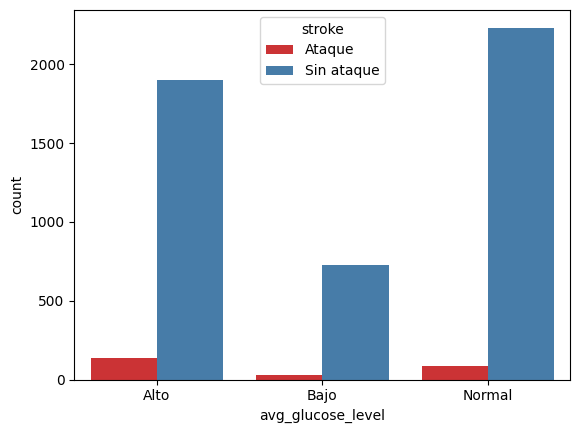

In [46]:
grupo = dataset.groupby(['avg_glucose_level', 'stroke']).size().reset_index(name='count')

sns.barplot(data=grupo, x='avg_glucose_level', y='count', hue='stroke', palette='Set1')

Nivel de BMI vs ACV

In [47]:
dataset.groupby(['bmi', 'stroke']).size()

bmi           stroke    
 Sobrepeso    Ataque         211
              Sin ataque    3292
Bajo de peso  Ataque           1
              Sin ataque     403
Peso normal   Ataque          37
              Sin ataque    1166
dtype: int64

Rangos de edad vs ACV

In [48]:
dataset.groupby(['Rango_edad', 'stroke']).size()

Rango_edad    stroke    
adulto        Ataque          70
              Sin ataque    2711
adulto mayor  Ataque         177
              Sin ataque    1127
joven         Ataque           2
              Sin ataque    1023
dtype: int64

## Preparación de los Datos

Borrar columna ID

In [49]:
if 'id' in dataset.columns:
    dataset.drop('id', axis=1, inplace=True)

Distribución de la variable objetivo


<Axes: xlabel='stroke', ylabel='count'>

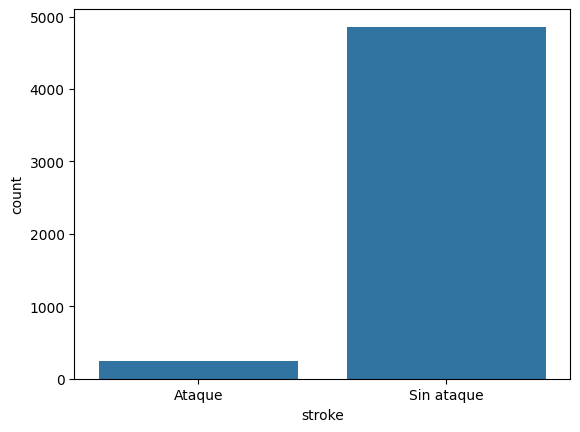

In [50]:
sns.countplot(x='stroke', data=dataset)


In [51]:
dataset["stroke"].value_counts(normalize=True)

,proportion
stroke,
Sin ataque,0.951272
Ataque,0.048728


desbalance, buen accuracy

# **Listado de variables**

In [52]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Rango_edad
0,Hombre,67.0,No,Sí,Yes,Empleado privado,Urban,Alto,Sobrepeso,Fumó anteriormente,Ataque,adulto mayor
1,Mujer,61.0,No,No,Yes,Independiente,Rural,Alto,Sobrepeso,Nunca fumó,Ataque,adulto mayor
2,Hombre,80.0,No,Sí,Yes,Empleado privado,Rural,Alto,Sobrepeso,Nunca fumó,Ataque,adulto mayor
3,Mujer,49.0,No,No,Yes,Empleado privado,Urban,Alto,Sobrepeso,Fuma,Ataque,adulto
4,Mujer,79.0,Sí,No,Yes,Independiente,Rural,Alto,Peso normal,Nunca fumó,Ataque,adulto mayor
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Mujer,80.0,Sí,No,Yes,Empleado privado,Urban,Normal,Sobrepeso,Nunca fumó,Sin ataque,adulto mayor
5106,Mujer,81.0,No,No,Yes,Independiente,Urban,Alto,Sobrepeso,Nunca fumó,Sin ataque,adulto mayor
5107,Mujer,35.0,No,No,Yes,Independiente,Rural,Normal,Sobrepeso,Nunca fumó,Sin ataque,adulto
5108,Hombre,51.0,No,No,Yes,Empleado privado,Rural,Alto,Sobrepeso,Fumó anteriormente,Sin ataque,adulto


In [53]:
dataset['stroke'].value_counts()

,count
stroke,
Sin ataque,4861
Ataque,249


In [54]:
def entropia(p1, p0):
    total = p1 + p0
    if p1 == 0 or p0 == 0:
        return 0
    return -(p1/total)*math.log2(p1/total) - (p0/total)*math.log2(p0/total)




In [55]:
x = 4861
y= 249
z= x+y

H = entropia(x,y)
print("Entropía inicial del conjunto de datos")
H

Entropía inicial del conjunto de datos


0.28096875511730324

In [56]:
#IG(gender)
xm1=141
xm0=2853
ym=xm1+xm0

xh1=108
xh0=2007
yh=xh1+xh0

xo1=0
xo0=1
yo=xo1+xo0

hm = entropia(xm1,xm0)
hh = entropia(xh1,xh0)
ho = entropia(xo1,xo0)


#ganancia
GanGen = H-((ym/z)*hm)-((yh/z)*hh)-((yo/z)*ho)

GanGen

7.332711044193141e-05

In [57]:
#IG(age)
xj1=2
xj0=1023
yj=xj1+xj0

xa1=70
xa0=2711
ya=xa1+xa0

xam1=177
xam0=1127
yam=xam1+xam0

hj = entropia(xj1,xj0)
ha = entropia(xa1,xa0)
ham = entropia(xam1,xam0)

#ganancia
GanAge = H-((yj/z)*hj)-((ya/z)*ha)-((yam/z)*ham)

GanAge

0.03838898555357506

In [58]:
#IG(hypertension)
xs1=66
xs0=432
ys=xs1+xs0

xn1=183
xn0=4429
yn=xn1+xn0

hs = entropia(xs1,xs0)
hn = entropia(xn1,xn0)

#ganancia
GanHype = H-((ys/z)*hs)-((yn/z)*hn)

GanHype

0.008621115929132117

In [59]:
#IG(heart_disease)
xsh1=47
xsh0=229
ysh=xsh1+xsh0

xnh1=202
xnh0=4632
ynh=xnh1+xnh0

hsh = entropia(xsh1,xsh0)
hnh = entropia(xnh1,xnh0)
#ganancia
GanHeart = H-((ysh/z)*hsh)-((ynh/z)*hnh)

GanHeart

0.008507329652617246

In [60]:
#IG(ever_married)
xsm1=220
xsm0=3133
ysm=xsm1+xsm0

xnm1=29
xnm0=1728
ynm=xnm1+xnm0

hsm = entropia(xsm1,xsm0)
hnm = entropia(xnm1,xnm0)
#ganancia
GanMarry = H-((ysm/z)*hsm)-((ynm/z)*hnm)

GanMarry

0.010026409159932227

In [61]:
#IG(work_type)
xpr1=149
xpr0=2776
ypr=xpr1+xpr0

xpu1=33
xpu0=624
ypu=xpu1+xpu0

xin1=65
xin0=754
yin=xin1+xin0

xni1=2
xni0=685
yni=xni1+xni0

xnu1=0
xnu0=22
ynu=xnu1+xnu0

hpr = entropia(xpr1,xpr0)
hpu = entropia(xpu1,xpu0)
hin = entropia(xin1,xin0)
hni = entropia(xni1,xni0)
hnu = entropia(xnu1,xnu0)

#ganancia
GanWork = H-((ypr/z)*hpr)-((ypu/z)*hpu)-((yin/z)*hin)-((yni/z)*hni)-((ynu/z)*hnu)

GanWork

0.009847009983427189

In [62]:
#IG(Smoking_status)
xdes1=47
xdes0=1497
ydes=xdes1+xdes0

xfu1=42
xfu0=747
yfu=xfu1+xfu0

xnun1=90
xnun0=1802
ynun=xnun1+xnun0

xexf1=70
xexf0=815
yexf=xexf1+xexf0

hdes = entropia(xdes1,xdes0)
hfu = entropia(xfu1,xfu0)
hnun = entropia(xnun1,xnun0)
hexf = entropia(xexf1,xexf0)

#ganancia
GanSmoke = H-((ydes/z)*hdes)-((yfu/z)*hfu)-((ynun/z)*hnun)-((yexf/z)*hexf)

GanSmoke

0.003968124837943399

In [63]:
#IG(avg_glucose_level)
xalt1=138
xalt0=1901
yalt=xalt1+xalt0

xbaj1=27
xbaj0=727
ybaj=xbaj1+xbaj0

xnor1=84
xnor0=2233
ynor=xnor1+xnor0

halt = entropia(xalt1,xalt0)
hbaj = entropia(xbaj1,xbaj0)
hnor = entropia(xnor1,xnor0)

#ganancia
GanGluco = H-((yalt/z)*halt)-((ybaj/z)*hbaj)-((ynor/z)*hnor)

GanGluco

0.0036204562110482563

In [64]:
#IG(bmi)
xpnor1=37
xpnor0=1166
ypnor=xpnor1+xpnor0

xpbaj1=1
xpbaj0=403
ypbaj=xpbaj1+xpbaj0

xsobp1=211
xsobp0=3292
ysobp=xsobp1+xsobp0

hpnor = entropia(xpnor1,xpnor0)
hpbaj = entropia(xpbaj1,xpbaj0)
hsobp = entropia(xsobp1,xsobp0)

#ganancia
GanBMI = H-((ypnor/z)*hpnor)-((ypbaj/z)*hpbaj)-((ysobp/z)*hsobp)

GanBMI

0.007232669710621614

In [75]:


# 1. Entropía de una columna categórica

def calcular_entropia_columna(columna):
    """
    Calcula la entropía de una serie categórica.
    H(X) = - sum p(x) log2 p(x)
    """
    prob = columna.value_counts(normalize=True)  # proporciones
    return -np.sum(prob * np.log2(prob))



# 2. Ganancia de información de Y respecto a X

def ganancia_informacion(df, columna_objetivo, columna_predictora):
    """
    IG(Y, X) = H(Y) - H(Y|X)
    df: DataFrame
    columna_objetivo: str, nombre de la variable objetivo (por ej. 'stroke')
    columna_predictora: str, nombre de la variable explicativa
    """
    # Entropía de la variable objetivo
    H_y = calcular_entropia_columna(df[columna_objetivo])

    # Entropía condicional H(Y|X)
    H_y_x = 0.0
    n_total = len(df)

    # Para cada valor de X, calculamos H(Y | X = x) y lo ponderamos
    for valor_x, conteo_x in df[columna_predictora].value_counts().items():
        subset = df[df[columna_predictora] == valor_x]
        peso = conteo_x / n_total
        H_y_dado_x = calcular_entropia_columna(subset[columna_objetivo])
        H_y_x += peso * H_y_dado_x

    # Ganancia de información
    return H_y - H_y_x


# 3. Evaluar TODAS las variables vs 'stroke'


def evaluar_variables(df, objetivo):
    """
    Calcula la ganancia de información de TODAS las variables
    respecto a 'objetivo' y devuelve un DataFrame ordenado.
    """
    variables = [col for col in df.columns if col != objetivo]  # excluimos la objetivo
    resultados = []

    for var in variables:
        ig = ganancia_informacion(df, objetivo, var)
        resultados.append((var, ig))

    resultados_df = pd.DataFrame(resultados, columns=['Variable', 'Ganancia_Información'])
    resultados_df = resultados_df.sort_values(by='Ganancia_Información', ascending=False)
    return resultados_df


resultado_id3 = evaluar_variables(dataset, 'stroke')
print(resultado_id3)


             Variable  Ganancia_Información
1                 age              0.064441
10         Rango_edad              0.038389
4        ever_married              0.010026
5           work_type              0.009847
2        hypertension              0.008621
3       heart_disease              0.008507
8                 bmi              0.007233
9      smoking_status              0.003968
7   avg_glucose_level              0.003620
6      Residence_type              0.000173
0              gender              0.000073


### MODELADO

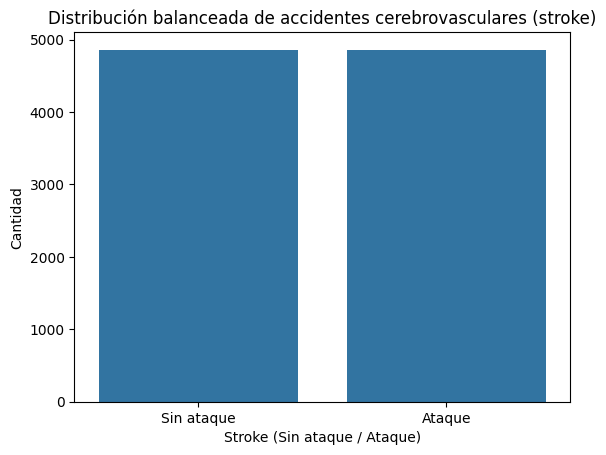

stroke
Sin ataque    4861
Ataque        4861
Name: count, dtype: int64


In [76]:

# Separar clases usando las etiquetas correctas
dataset_majority = dataset[dataset.stroke == "Sin ataque"]
dataset_minority = dataset[dataset.stroke == "Ataque"]

# Sobremuestreo de la clase minoritaria
df_minority_oversampled = resample(
    dataset_minority,
    replace=True,                     # Muestreo con reemplazo
    n_samples=len(dataset_majority),  # Igualar el tamaño de la clase mayoritaria
    random_state=42                   # Semilla reproducible
)

# Combinar los datos balanceados
dataset_balanced = pd.concat([dataset_majority, df_minority_oversampled])

# Visualización del balanceo
sns.countplot(x='stroke', data=dataset_balanced)
plt.title("Distribución balanceada de accidentes cerebrovasculares (stroke)")
plt.xlabel("Stroke (Sin ataque / Ataque)")
plt.ylabel("Cantidad")
plt.show()

# Confirmar conteo final
print(dataset_balanced["stroke"].value_counts())


In [67]:
dataset["stroke"].value_counts()

,count
stroke,
Sin ataque,4861
Ataque,249


In [68]:
dataset_balanced["stroke"].value_counts()

,count
stroke,
Sin ataque,4861
Ataque,4861


Variables numéricas: ['age']
Variables categóricas: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'Rango_edad']

=== Reporte de Clasificación ===
              precision    recall  f1-score   support

      Ataque       0.85      0.93      0.89      1459
  Sin ataque       0.92      0.84      0.88      1458

    accuracy                           0.88      2917
   macro avg       0.89      0.88      0.88      2917
weighted avg       0.89      0.88      0.88      2917


=== Métrica ROC-AUC ===
ROC-AUC Score: 0.9691


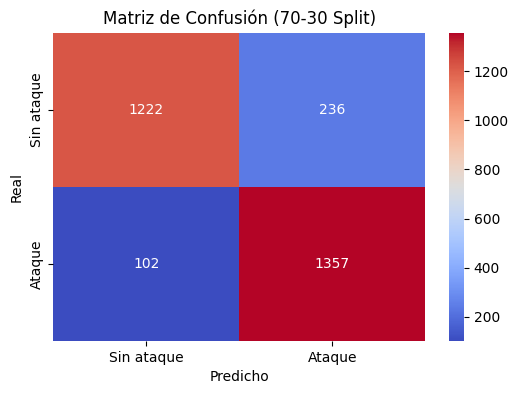

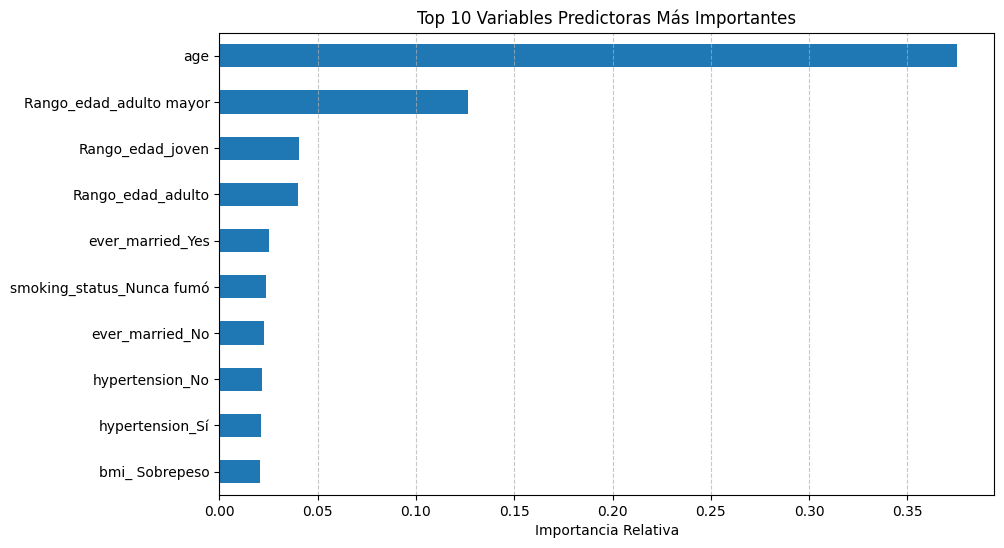

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(



Mejores parámetros: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

=== Reporte de Clasificación (Mejor modelo) ===
              precision    recall  f1-score   support

      Ataque       0.76      0.87      0.81      1459
  Sin ataque       0.85      0.73      0.78      1458

    accuracy                           0.80      2917
   macro avg       0.81      0.80      0.80      2917
weighted avg       0.81      0.80      0.80      2917


=== ROC-AUC (Mejor modelo) ===
ROC-AUC Score: 0.8718


In [77]:

# 0. Imports necesarios

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


data = dataset_balanced.copy()

# Definir variables
X = data.drop('stroke', axis=1)
y = data['stroke']      # 'Sin ataque' / 'Ataque'

# 2. Split 70-30 estratificado

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


# 3. Configurar preprocesamiento

numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = X.select_dtypes(include=['object']).columns.tolist()

print("Variables numéricas:", numericas)
print("Variables categóricas:", categoricas)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas)
    ]
)


# 4. Pipeline completo con RandomForest

rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Entrenamiento
model.fit(X_train, y_train)


# 5. Evaluación del Modelo


# Predicciones discretas
y_pred = model.predict(X_test)

# Probabilidades de la clase POSITIVA ('Ataque')
pos_class = 'Ataque'
class_index = list(model.named_steps['classifier'].classes_).index(pos_class)
y_proba = model.predict_proba(X_test)[:, class_index]

# Convertir y_test a 0/1 para ROC
y_test_bin = (y_test == pos_class).astype(int)

print("\n=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred))

print("\n=== Métrica ROC-AUC ===")
print(f"ROC-AUC Score: {roc_auc_score(y_test_bin, y_proba):.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=['Sin ataque', 'Ataque'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
            annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Sin ataque', 'Ataque'],
            yticklabels=['Sin ataque', 'Ataque'])
plt.title('Matriz de Confusión (70-30 Split)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# 6. Importancia de características

# Sacar nombres de características del OneHotEncoder
cat_encoder = model.named_steps['preprocessor'].named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(categoricas)

all_features = list(numericas) + list(cat_features)

importances = model.named_steps['classifier'].feature_importances_

feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.head(10).plot(kind='barh')
plt.title('Top 10 Variables Predictoras Más Importantes')
plt.xlabel('Importancia Relativa')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()


# 7. Optimización Adicional (GridSearch)
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='recall',     # para priorizar detectar 'Ataque'
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("\nMejores parámetros:", grid_search.best_params_)

# Evaluar mejor modelo
y_pred_best = best_model.predict(X_test)

class_index_best = list(best_model.named_steps['classifier'].classes_).index(pos_class)
y_proba_best = best_model.predict_proba(X_test)[:, class_index_best]
y_test_bin = (y_test == pos_class).astype(int)

print("\n=== Reporte de Clasificación (Mejor modelo) ===")
print(classification_report(y_test, y_pred_best))

print("\n=== ROC-AUC (Mejor modelo) ===")
print(f"ROC-AUC Score: {roc_auc_score(y_test_bin, y_proba_best):.4f}")
